<H1> Ingénierie des données </H1>

Dans ce notebook nous présentons l'une des étapes essentielles de la classification : l'ingénierie des données. Nous abordons le traitement des données catégorielles, la mise à l'échelle et le traitement des valeurs manquantes. Il existe de très nombreuses méthodes qui ont forcément un impact sur le résultat de la classification. Il est important de bien les comprendre et de rechercher celle qui est la plus adaptée en fonction du contexte.

## Traitement des données catégorielles ou qualitatives

De très nombreux jeux de données contiennent des données catégorielles comme une couleur, une adresse, etc. Même les classes peuvent être catégorielles (avis positif, avis négatif). De nombreux algorithmes ne sont pas capables de les traiter car ils considérent uniquement des valeurs numériques. Dans cette section nous présentons différentes manières de transformer les données catégorielles. Elles dépendent bien entendu du contexte. 

**Rappel** : les attributs pour lesquels il n'existe pas d'ordre sont appelés nominaux (par exemple les couleurs). En opposition ceux pour lesquels il existe un ordre sont appelés ordinaux (taille XL, L, M).

Considérons l'exemple suivant qui contient des attributs numériques et catégoriels. 

In [29]:

import pandas as pd

df = pd.DataFrame(
    {'Taille': ['XL','L','M','S'], 
     'Couleur': ['bleu','blanc','rouge','vert'],
     'Prix': [20.76,23.5,40.99,10.0],
     'Classe': ['classe1','classe1','classe2','classe3']},columns=['Taille','Couleur','Prix','Classe'])

print ('Pour connaître les informations qui sont catégorielles, faire un df.info()')
print (df.info())



Pour connaître les informations qui sont catégorielles, faire un df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
Taille     4 non-null object
Couleur    4 non-null object
Prix       4 non-null float64
Classe     4 non-null object
dtypes: float64(1), object(3)
memory usage: 208.0+ bytes
None


Dans un jeu de données pour connaître les attributs qui ne sont pas numériques, il suffit de faire, pour un dataframe de nom df, un df.info() et les attributs non numériques apparaissent avec le type object.  Attention toutefois, lorsqu'il y a la présence de valeurs manquantes il se peut que l'attribut apparaisse avec le dtype objet. Par exemple en remplaçant le dataframe précédent par :  
'Prix': [20.76,'nan',40.99,10.0]  
l'information sur l'attribut prix sera : Prix       4 non-null object 


Il est également possible de faire un df.describe() qui affiche des statistiques (moyenne, max, min, etc) uniquement pour les attributs numériques.

In [31]:
print ('Pour connaître quelques statistiques, faire un df.describe()')


display(df.describe())

Pour connaître quelques statistiques, faire un df.describe()


,Prix
count,4.000000
mean,23.812500
std,12.848697
min,10.000000
25%,18.070000
50%,22.130000
75%,27.872500
max,40.990000


Un df.describe() sur un attribut non numérique donne d'autres informations.

In [33]:
display(df['Couleur'].describe())

count        4
unique       4
top       bleu
freq         1
Name: Couleur, dtype: object

<H2> Remplacement de la valeur </H2>  
La première approche la plus simple est de remplacer les valeurs. Considérons qu'il y ait un ordre pour les tailles tels que S=1, M=S+1 etc. Il est possible de transformer les valeurs à l'aide de la fonction map appliquée au dataframe

In [4]:
#creation de la transformation
replace_map = {'XL': 4, 'L': 3, 'M': 2, 'S': 1}

In [5]:
#creation d'une copie de df pour ne pas perdre le df initial
df_test=df.copy()

print ('Application de la fonction map \n')
print (df_test['Taille'].map(replace_map))

print ("\nAjout d'une colonne au dataframe avec application de la fonction map \n")
df_test["Taille renommée"]=df_test['Taille'].map(replace_map)

display(df_test)       
       
print ("\nRemplacement direct de taille avec les nouvelles valeurs\n")
   
df_test.replace(replace_map, inplace=True)

display(df_test)

Application de la fonction map 

0    4
1    3
2    2
3    1
Name: Taille, dtype: int64

Ajout d'une colonne au dataframe avec application de la fonction map 



,Taille,Couleur,Prix,Classe,Taille renommée
0,XL,bleu,20.76,classe1,4
1,L,blanc,23.50,classe1,3
2,M,rouge,40.99,classe2,2
3,S,vert,10.00,classe3,1



Remplacement direct de taille avec les nouvelles valeurs



,Taille,Couleur,Prix,Classe,Taille renommée
0,4,bleu,20.76,classe1,4
1,3,blanc,23.50,classe1,3
2,2,rouge,40.99,classe2,2
3,1,vert,10.00,classe3,1


<H2> Label encoding </H2>

Une autre approche appelée label encoding consiste à transformer l'ensemble des valeurs par un nombre de 0 au nombre-1 de catégories. Il suffit pour cela d'utiliser la fonction *LabelEncoder*.

In [6]:
from sklearn.preprocessing import LabelEncoder

#creation d'une copie de df pour ne pas perdre le df initial
df_test=df.copy()

class_label_encoder = LabelEncoder()
print ("\n Affichage des transformations\n")
print(class_label_encoder.fit_transform(df_test['Classe'].values))

print ("\nAjout d'une colonne au dataframe")
df_test["Classe renommée"] = class_label_encoder.fit_transform(df_test["Classe"])

display (df_test)

print ("\nRemplacement direct de classe avec les nouvelles valeurs\n")
df_test["Classe"] = class_label_encoder.fit_transform(df_test["Classe"])

display(df_test)



 Affichage des transformations

[0 0 1 2]

Ajout d'une colonne au dataframe


,Taille,Couleur,Prix,Classe,Classe renommée
0,XL,bleu,20.76,classe1,0
1,L,blanc,23.50,classe1,0
2,M,rouge,40.99,classe2,1
3,S,vert,10.00,classe3,2



Remplacement direct de classe avec les nouvelles valeurs



,Taille,Couleur,Prix,Classe,Classe renommée
0,XL,bleu,20.76,0,0
1,L,blanc,23.50,0,0
2,M,rouge,40.99,1,1
3,S,vert,10.00,2,2


<H2> One Hot Encoding</H2>  

Le label encoding a l'avantage d'être direct à obtenir mais le désavantage de donner des valeurs croissantes qui peuvent être mal considérés par les classifieurs. Par exemple dans le cas des tailles il est plus logique que XL qui est le plus grand ait une grande valeur. Par contre pour les couleurs cela ne correspond pas à une réalité. On ne peut pas dire que bleu a 4 fois plus de poids que vert par exemple.  

Le principe est de convertir chaque valeur de catégorie dans une nouvelle colonne et de mettre une valeur 1 ou 0 (vrai/faux) à la colonne. Cette approche a l'avantage de ne plus mettre de poids différents pour un attribut mais à l'inconvénient de rajouter un grand nombre de colonnes si le nombre de catégories est important. 

Scikit learn propose la fonction *get_dummies* pour effectuer la transformation. Cette dernière prend en paramètre le dataframe, les colonnes sur lesquelles doivent s'effectuer les transformation et un prefixe qui sera utilisé pour nommer les colonnes.  
*pd.get_dummies(df,columns=['colA','colB',..],prefix = ['leprefix'])*

In [7]:

#creation d'une copie de df pour ne pas perdre le df initial
df_test=df.copy()

print ("\n Affichage des transformations\n")
print (pd.get_dummies(df_test[['Couleur']]))

print ("\nAjout des colonne au dataframe")
df_test = pd.get_dummies(df_test,columns=['Couleur'],prefix = ['Coul'])

display (df_test)




 Affichage des transformations

   Couleur_blanc  Couleur_bleu  Couleur_rouge  Couleur_vert
0              0             1              0             0
1              1             0              0             0
2              0             0              1             0
3              0             0              0             1

Ajout des colonne au dataframe


,Taille,Prix,Classe,Coul_blanc,Coul_bleu,Coul_rouge,Coul_vert
0,XL,20.76,classe1,0,1,0,0
1,L,23.50,classe1,1,0,0,0
2,M,40.99,classe2,0,0,1,0
3,S,10.00,classe3,0,0,0,1


##  Mise à l'échelle des valeurs attributs (Feature scaling)

Le mise à l'échelle des valeurs des attributs (Feature scaling)  est une méthode qui est utilisée pour normaliser les tailles des valeurs des attributs. Elle est aussi appelée **normalisation** (ou **standardisation**) et constitue une étape très importante dans le pré-traitement des données notamment lorsque des distances sont utilisées. C'est le cas par exemple pour KNN, SVM, Regression, ... mais également pour des méthodes de réduction de dimensions comme PCA et même en apprentissage non supervisée (K-Means).  

La normalisation est, bien entendu, effectuée attribut par attribut dans le cas où plusieurs attributs doivent être mis à l'échelle. 


<H2> Normalisation (ou min-max scaling)</H2>  

La normalisation permet de mettre toutes les valeurs dans un intervalle de [0,1]. Elle suit la formule :  
    $$z= \frac{x-min(x)}{max(x)-min(x)}$$  
    
En scikit learn la normalisation se fait par la fonction *MinMaxScaler()*. Par défaut MinMaxScaler normalise entre 0 et 1. Il est possible de changer la valeur : *MinMaxScaler(feature_range=(0, 2))* normalisera les valeurs entre 0 et 2.

In [8]:
import pandas as pd
import numpy as np
#import numpy.random.uniform¶
from sklearn import preprocessing

print ("Création d'un dataframe de 7 valeurs")
data = {'Valeur': [14,-16,34,17,65,-32,5]}
df = pd.DataFrame(data,dtype='float')
#dtype = float car la normalisation considère que les objets sont des float
display("Max : ",df.max()," Min : ",df.min(),df)

df.plot(kind='bar')

Création d'un dataframe de 7 valeurs


'Max : '

Valeur    65.0
dtype: float64

' Min : '

Valeur   -32.0
dtype: float64

,Valeur
0,14.0
1,-16.0
2,34.0
3,17.0
4,65.0
5,-32.0
6,5.0


Création d'un dataframe normalisé


'Max : '

Valeur    1.0
dtype: float64

' Min : '

Valeur    0.0
dtype: float64

,Valeur
0,0.474227
1,0.164948
2,0.680412
3,0.505155
4,1.000000
5,0.000000
6,0.381443


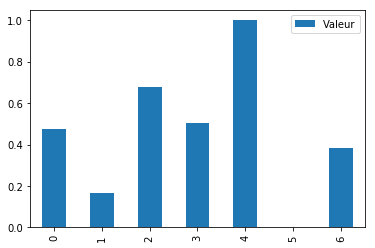

In [9]:
print ("Création d'un dataframe normalisé")
normalise = preprocessing.MinMaxScaler()
df_normalise = normalise.fit_transform(df)
df_normalise = pd.DataFrame(df_normalise, columns=['Valeur'])

display("Max : ",df_normalise.max()," Min : ",df_normalise.min(),df_normalise)
df_normalise.plot(kind='bar')

'Max : '

Valeur    2.0
dtype: float64

' Min : '

Valeur    0.0
dtype: float64

,Valeur
0,0.948454
1,0.329897
2,1.360825
3,1.010309
4,2.000000
5,0.000000
6,0.762887


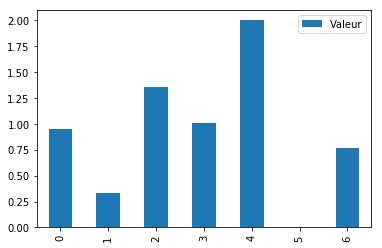

In [10]:
#scaler = MinMaxScaler(feature_range=(0, 1)) 
normalise = preprocessing.MinMaxScaler(feature_range=(0, 2))
df_normalise = normalise.fit_transform(df)
df_normalise = pd.DataFrame(df_normalise, columns=['Valeur'])

display("Max : ",df_normalise.max()," Min : ",df_normalise.min(),df_normalise)
df_normalise.plot(kind='bar')

L'exemple suivant illustre l'intérêt de normaliser plusieurs attributs. Il contient trois attributs où chaque valeur est prise au hasard en fonction d'une loi de distribution différente (2 assymétriques et 1 symétrique) : une avec une loi de distribution $X^2$ (https://fr.wikipedia.org/wiki/Loi_du_χ²), une avec une loi bêta (https://fr.wikipedia.org/wiki/Loi_bêta) et une avec une loi normale. L’asymétrie d’une distribution est positive si la queue de droite (à valeurs hautes) est plus longue ou grosse, et négative si la queue de gauche (à valeurs basses) est plus longue ou grosse (https://fr.wikipedia.org/wiki/Asymétrie_(statistiques)).


In [34]:
df = pd.DataFrame({
    # asymétrie positive
    'ChiSquare': np.random.chisquare(3, 1000)+50,
    # asymétrie négative
    'Beta': np.random.beta(20, 1, 1000)*30,
    # pas d'asymétrie
    'Normale': np.random.normal(110, 15, 1000)
})

/Users/pascalponcelet/Desktop/Sicki-learn/Tools/tools/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


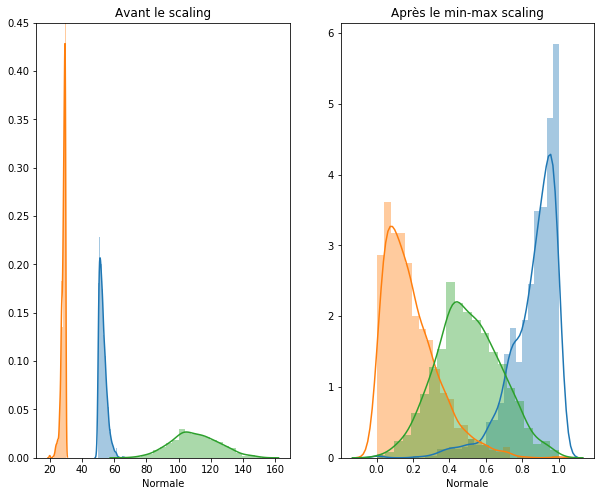

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['ChiSquare', 'Beta', 'Normale'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8))
ax1.set_title('Avant le scaling')
sns.distplot(df['ChiSquare'], ax=ax1,kde=True)
sns.distplot(df['Beta'], ax=ax1,kde=True)
sns.distplot(df['Normale'], ax=ax1,kde=True)

ax2.set_title('Après le min-max scaling')
sns.distplot(scaled_df['ChiSquare'], ax=ax2,kde=True)
sns.distplot(scaled_df['Beta'], ax=ax2,kde=True)
sns.distplot(scaled_df['Normale'], ax=ax2,kde=True)

plt.show()

Nous pouvons constater que les asymétries restent les mêmes mais que maintenant toutes les valeurs sont comprises entre 0 et 1.

<H2> Standardisation </H2>


La standardisation est utile lorsque les attributs suivent des lois normales mais avec des moyennes et écarts type différents. Elle permet, par exemple, de rendre les algorithmes moins sensibles aux outliers.  

En scikit learn la standardisation se fait par la fonction StandardScaler() en appliquant :  

$$z=\frac{x_i - \mu}{\sigma}\\
$$
où $\mu$ représente la moyenne (*mean*) et $\sigma$ l'écart type (*standard deviation*).  


Rappel : (https://fr.wikipedia.org/wiki/Loi_normale)  
Lorsqu'une variable aléatoire $X$ suit la loi normale, elle est dite *gaussienne* ou *normale* et il est habituel d'utiliser la notation avec la variance $\sigma^2$ :
$$X \sim \mathcal{N}(\mu, \sigma^2)$$

StandardScaler  suppose donc que les données suivent une loi normale et les redimensionne pour que la distribution soit centrée autour de 0 avec un écart-type de 1.   Elle vise donc à transformer les valeurs pour qu'elles répondent à la même loi normale $$X \sim \mathcal{N} (0, \, 1)$$.

Il est toujours intéressant d'afficher la distribution des données pour voir si ces dernières peuvent être standardisées.

,Valeur
0,10.0
1,9.0
2,8.0
3,7.0
4,6.0


'Moyenne '

7.5

' Ecart type '

1.7837651700316894

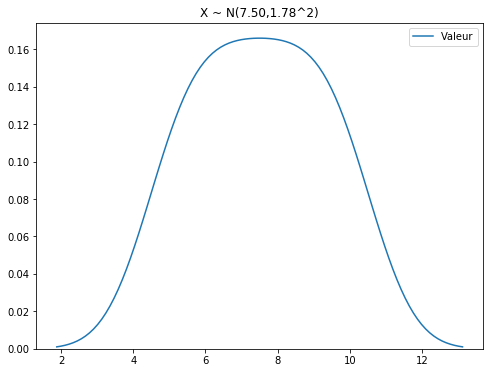

In [13]:
import numpy as np
from pandas import DataFrame


df = pd.DataFrame(
    {'Valeur': [10,9,8,7,6,5,5,6,7,8,9,10]}, 
     dtype='float',
     columns=['Valeur'])

display(df.head(),"Moyenne ",df['Valeur'].mean()," Ecart type ",df['Valeur'].std())

fig, ax1 = plt.subplots(ncols=1, figsize=(8, 6))
title='X ~ N(''%0.2f'%df['Valeur'].mean()+",%0.2f"%df['Valeur'].std()+'^2)'
ax1.set_title(title)

sns.kdeplot(df['Valeur'], ax=ax1);

Création d'un dataframe avec StandardScaler


,Valeur
0,1.46385
1,0.87831
2,0.29277
3,-0.29277
4,-0.87831
5,-1.46385
6,-1.46385
7,-0.87831
8,-0.29277
9,0.29277


'Moyenne '

-1.850371707708594e-17

' Ecart type '

1.044465935734187

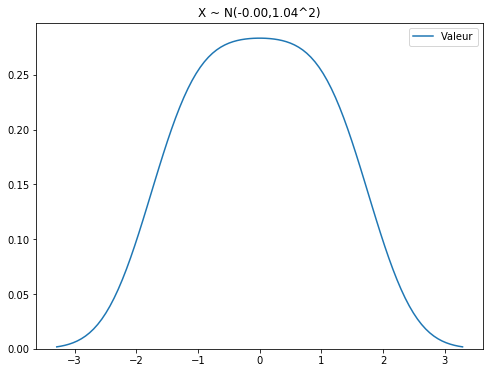

In [14]:
from sklearn.preprocessing import StandardScaler

print ("Création d'un dataframe avec StandardScaler")
standardscaler = preprocessing.StandardScaler()
df_standardscale = standardscaler.fit_transform(df)
df_standardscale = pd.DataFrame(df_standardscale, columns=['Valeur'])

display(df_standardscale,"Moyenne ",df_standardscale['Valeur'].mean()," Ecart type ",df_standardscale['Valeur'].std())

fig, ax1 = plt.subplots(ncols=1, figsize=(8, 6))
title='X ~ N(''%0.2f'%df_standardscale['Valeur'].mean()+",%0.2f"%df_standardscale['Valeur'].std()+'^2)'
ax1.set_title(title)

sns.kdeplot(df_standardscale['Valeur'], ax=ax1);

Comme précédémment, le code suivant illustre la standardisation avec 
$$X \sim \mathcal{N}(10, 2^2)$$
$$X \sim \mathcal{N}(40, 7^2)$$
$$X \sim \mathcal{N}(110, 15^2)$$.

In [15]:
df = pd.DataFrame({
    'Normale1': np.random.normal(10, 2,1000),
    'Normale2': np.random.normal(40, 7, 1000),
    'Normale3': np.random.normal(110, 15, 1000)
})

/Users/pascalponcelet/Desktop/Sicki-learn/Tools/tools/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


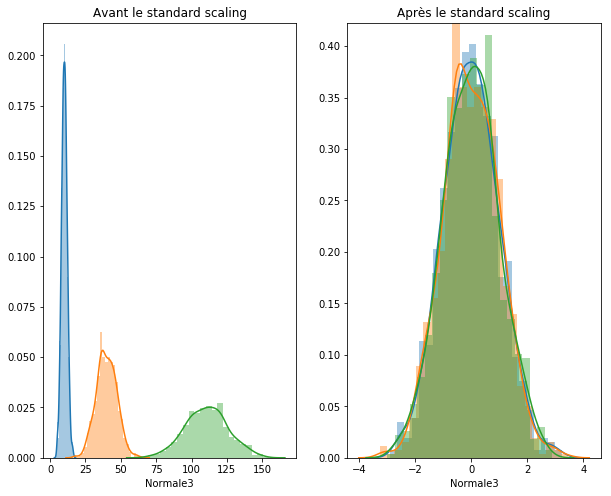

In [16]:

standardscaler = preprocessing.StandardScaler()
df_standardscale = standardscaler.fit_transform(df)
df_standardscale = pd.DataFrame(df_standardscale, columns=['Normale1', 'Normale2', 'Normale3'])


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8))
ax1.set_title('Avant le standard scaling')
sns.distplot(df['Normale1'], ax=ax1)
sns.distplot(df['Normale2'], ax=ax1)
sns.distplot(df['Normale3'], ax=ax1)

ax2.set_title('Après le standard scaling')
sns.distplot(df_standardscale['Normale1'], ax=ax2)
sns.distplot(df_standardscale['Normale2'], ax=ax2)
sns.distplot(df_standardscale['Normale3'], ax=ax2)

plt.show()

## Traitement des valeurs manquantes

Dans les données réelles, de très nombreuses fois et pour différentes raisons (données corrompues, données inexistantes, extraction incomplète, etc.) des valeurs peuvent être absentes ou apparaître sous la forme d'outlier. Généralement on parle de **valeurs manquantes** et elles peuvent proser de nombreux problèmes pour certains classifiers qui y sont très sensibles (e.g. SVM).  

En fonction des domaines, elles peuvent apparaître sous la forme de -1, 0, -999 ou NaN (Not a Number). Pandas, numpy et scikit learn utilisent NaN pour les valeurs manquantes et toutes valeurs avec NaN sont ignorées dans les opérations d'agrégation comme sum, count, etc.  Il est donc préférable de remplacer toutes les valeurs manquantes par NaN.

Pour remplacer des données sous la forme de NaN il suffit d'utiliser la fonction *replace()* du dataframe.



In [17]:
import pandas as pd
import numpy as np
data = [[7, 2, 3], [4, -1, 6], [10, 5, 9]]
print('Remplacement valeur -1 en nan\n')
df = pd.DataFrame(data)
print ('Avant :')
display(df)
df=df.replace(-1,np.nan)
print ('Après :')
display(df)

Remplacement valeur -1 en nan

Avant :


,0,1,2
0,7,2,3
1,4,-1,6
2,10,5,9


Après :


,0,1,2
0,7,2.0,3
1,4,NaN,6
2,10,5.0,9


Il existe différentes stratégies, en fonction des données et du domaine, pour traiter les valeurs manquantes :   
1. Supprimer les lignes contenant des valeurs manquantes
1. Remplacer les valeurs par *mean*, *median*, *mode*
1. Mettre une catégorie unique
1. Prédire la valeur manquante  

Chaque stratégie a des avantages et des inconvénients. Au travers de l'exemple suivant nous illustrons les différentes stratégies et les fonctionnalités de sickit learn pour les traiter.  

In [18]:

#Création de fichiers exemples
fichier = open("exemplenullvalues.csv", "w")
fichier.write("Nom;Age;Dept;Sal;Prime\n")
fichier.write("Marie;22;;48000;1\n")
fichier.write("Isabelle;;Comptable;52000;0\n")
fichier.write("Pierre;35;Informatique;;1\n")
fichier.write("Paul;43;Commercial;49000;1\n")
fichier.write("Jean;;Commercial;;0\n")
fichier.write("Michel;35;;51000;0\n")
fichier.write("Nancy;45;;66000;1\n")
fichier.close()



Pour connaître le nombre de valeurs manquantes : 

In [19]:
df = pd.read_csv('exemplenullvalues.csv',sep=';')
display (df)


print ('Par rapport aux colonnes :\n')
display (df.info())
print ('\nPar rapport aux différentes lignes :\n')
display (df.isnull().sum(axis=1))


,Nom,Age,Dept,Sal,Prime
0,Marie,22.0,NaN,48000.0,1
1,Isabelle,NaN,Comptable,52000.0,0
2,Pierre,35.0,Informatique,NaN,1
3,Paul,43.0,Commercial,49000.0,1
4,Jean,NaN,Commercial,NaN,0
5,Michel,35.0,NaN,51000.0,0
6,Nancy,45.0,NaN,66000.0,1


Par rapport aux colonnes :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
Nom      7 non-null object
Age      5 non-null float64
Dept     4 non-null object
Sal      5 non-null float64
Prime    7 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 360.0+ bytes


None


Par rapport aux différentes lignes :



0    1
1    1
2    1
3    0
4    2
5    1
6    1
dtype: int64

<H2>Supprimer les lignes contenant des valeurs manquantes</H2>  

Pour supprimer simplement les lignes (ou les colonnes) qui contiennent des valeurs manquantes, il est possible d'utiliser la fonction dropna sur le dataframe :  
*DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)*  




In [20]:
df_test = df.copy() #pour tester
print ('Suppression des lignes pour lesquelles au moins un élément est manquant \n')
print (df_test.dropna())

print ('\nSuppression des colonnes pour lesquelles au moins un élément est manquant \n')
print (df_test.dropna(axis="columns"))

print ('\nSuppression des lignes qui ont au moins 4 valeurs non manquantes\n')
print (df_test.dropna(thresh=4))
print ("La ligne 4 n'apparait plus car elle a 2 valeurs manquantes sur les 5 colonnes")

print ('\nRemplacement du dataframe initial en supprimant les lignes manquantes')
df_test.dropna(inplace=True)
display(df_test)

Suppression des lignes pour lesquelles au moins un élément est manquant 

    Nom   Age        Dept      Sal  Prime
3  Paul  43.0  Commercial  49000.0      1

Suppression des colonnes pour lesquelles au moins un élément est manquant 

        Nom  Prime
0     Marie      1
1  Isabelle      0
2    Pierre      1
3      Paul      1
4      Jean      0
5    Michel      0
6     Nancy      1

Suppression des lignes qui ont au moins 4 valeurs non manquantes

        Nom   Age          Dept      Sal  Prime
0     Marie  22.0           NaN  48000.0      1
1  Isabelle   NaN     Comptable  52000.0      0
2    Pierre  35.0  Informatique      NaN      1
3      Paul  43.0    Commercial  49000.0      1
5    Michel  35.0           NaN  51000.0      0
6     Nancy  45.0           NaN  66000.0      1
La ligne 4 n'apparait plus car elle a 2 valeurs manquantes sur les 5 colonnes

Remplacement du dataframe initial en supprimant les lignes manquantes


,Nom,Age,Dept,Sal,Prime
3,Paul,43.0,Commercial,49000.0,1


**Remarques**  
La suppression des lignes permet de pouvoir utiliser des classifiers qui sont sensibles aux valeurs manquantes.  
L'utilisation de ces méthodes risquent de supprimer de nombreuses informations (C.f. le dernier exemple). Il est conseillé de ne pas les utiliser si le nombre d'objets supprimés est trop grand. Le remplacement est généralement préférable à la suppression des données.

<H2>Remplacer les valeurs par mean, median, mode</H2>  

Pour les variables numériques, il est possible de remplacer les valeurs manquantes par la moyenne, la médianne, le mode, etc. Rappel : dans une série le mode correspond à une valeur dominante, i.e. la valeur la plus représentée d'une variable quelconque dans une population donnée. Le choix dépend bien entendu du contexte. 

In [21]:
import numpy as np
print ('Rappel de la colonne Age\n', df['Age'])

print ('\nMoyenne', df['Age'].mean(),
       ' Median',df['Age'].median(), 
       '\nMode', df['Age'].mode())

print ('\n Remplacement des valeurs manquantes de Age par la moyenne\n')
df_test = df.copy() #pour tester
print ('Avant : \n')
display(df_test['Age'])
df_test['Age']=df_test['Age'].replace(np.NaN,df_test['Age'].mean())
print ('\nAprès : \n')
display(df_test['Age'])     

print ('\n Remplacement des valeurs manquantes de Age par la valeur la plus fréquente sans utiliser le mode\n')
df_test = df.copy() #pour tester
print ('Valeur la plus fréquente \n',
       df_test['Age'].value_counts().idxmax(),
       ' (',df_test['Age'].value_counts().max(),')')
newval=df_test['Age'].value_counts().idxmax()
print ('Avant : \n')
display(df_test['Age'])
df_test['Age']=df_test['Age'].replace(np.NaN,newval)
print ('\nAprès : \n')
display(df_test['Age'])     

print ('\n Données catégorielles. Remplacement des valeurs manquantes de Dept par la valeur la plus fréquente\n')
df_test = df.copy() #pour tester
print ('Valeur la plus fréquente',df_test['Dept'].value_counts().idxmax(),
      ' (',df_test['Dept'].value_counts().max(),')')
newval=df_test['Dept'].value_counts().idxmax()
print ('Avant : \n')
display(df_test['Dept'])
df_test['Dept']=df_test['Dept'].replace(np.NaN,newval)
print ('Après : \n')
display(df_test['Dept'])   


Rappel de la colonne Age
 0    22.0
1     NaN
2    35.0
3    43.0
4     NaN
5    35.0
6    45.0
Name: Age, dtype: float64

Moyenne 36.0  Median 35.0 
Mode 0    35.0
dtype: float64

 Remplacement des valeurs manquantes de Age par la moyenne

Avant : 



0    22.0
1     NaN
2    35.0
3    43.0
4     NaN
5    35.0
6    45.0
Name: Age, dtype: float64


Après : 



0    22.0
1    36.0
2    35.0
3    43.0
4    36.0
5    35.0
6    45.0
Name: Age, dtype: float64


 Remplacement des valeurs manquantes de Age par la valeur la plus fréquente sans utiliser le mode

Valeur la plus fréquente 
 35.0  ( 2 )
Avant : 



0    22.0
1     NaN
2    35.0
3    43.0
4     NaN
5    35.0
6    45.0
Name: Age, dtype: float64


Après : 



0    22.0
1    35.0
2    35.0
3    43.0
4    35.0
5    35.0
6    45.0
Name: Age, dtype: float64


 Données catégorielles. Remplacement des valeurs manquantes de Dept par la valeur la plus fréquente

Valeur la plus fréquente Commercial  ( 2 )
Avant : 



0             NaN
1       Comptable
2    Informatique
3      Commercial
4      Commercial
5             NaN
6             NaN
Name: Dept, dtype: object

Après : 



0      Commercial
1       Comptable
2    Informatique
3      Commercial
4      Commercial
5      Commercial
6      Commercial
Name: Dept, dtype: object

Scikit learn propose aussi une fonction *SimpleImputer* qui permet de remplacer directement les valeurs. Elle s'applique sur un tableau et non pas un dataframe.

In [22]:
import numpy as np
from sklearn.impute import SimpleImputer
array = df.values
X = array[:,1:2] 
print ('\n Remplacement des valeurs manquantes de Age par la moyenne\n')
print ('Avant : \n')
print (X)
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
print ('\nAprès : \n')
print (X)


 Remplacement des valeurs manquantes de Age par la moyenne

Avant : 

[[22.0]
 [nan]
 [35.0]
 [43.0]
 [nan]
 [35.0]
 [45.0]]

Après : 

[[22.]
 [36.]
 [35.]
 [43.]
 [36.]
 [35.]
 [45.]]


**Remarques**  
Cette approche est efficace quand le jeu de données est petit et que les valeurs peuvent facilement être remplacées.  
Le fait de faire des approximations ajoute des biais dans les données.

<H2> Affecter une catégorie unique </H2>  

Dans le cas de variables catégorielles, lorsqu'il n'est pas possible de pouvoir connaître la valeur, il est possible d'affecter une valeur similaire aux NaN.  
L'avantage est de pouvoir considérer toutes ces données comme étant de la même classe et ainsi elles seront transformées de la même manière que les autres valeurs de l'attribut lors de l'étape d'encodage de données catégorielles.  
L'inconvénient est d'avoir une nouvelle classe qui ne correspond pas à grand chose et qui peut donc entraîner des problèmes lors de la classification. 

In [23]:

print ('\n Remplacement des valeurs manquantes de Dept par une valeur commune\n')
df_test = df.copy() #pour tester
print ('Avant: \n')
display(df_test['Dept'])
df_test['Dept']=df_test['Dept'].fillna("Inconnu")
print ('\nAprès: \n')
display(df_test['Dept'])                


 Remplacement des valeurs manquantes de Dept par une valeur commune

Avant: 



0             NaN
1       Comptable
2    Informatique
3      Commercial
4      Commercial
5             NaN
6             NaN
Name: Dept, dtype: object


Après: 



0         Inconnu
1       Comptable
2    Informatique
3      Commercial
4      Commercial
5         Inconnu
6         Inconnu
Name: Dept, dtype: object

<H2> Prédire les valeurs manquantes </H2>  

Le principe est d'utiliser les autres attributs pour appliquer un algorithme d'apprentissage en considérant que la valeur à prédire est la colonne qui contient des NaN.  

L'exemple suivant illustre comment utiliser KNN pour prédire des valeurs.

In [24]:
import numpy as np

print ("Creation d'un jeu de données aléatoire de 100 lignes")
df_test = pd.DataFrame(
    {'Age': np.random.randint(30, 35, size=100), 
     'Sal': np.random.randint(3, size=100)*1000,
     'Prime':np.random.randint(2, size=100),
     'Dept': np.random.randint(3,size=100)},columns=['Age','Sal','Prime','Dept'])
     
print (df_test.shape)
display(df_test.head(5))
array = df_test

print ('Sélection de 3% du jeu de données pour mettre NaN dans les Dept')
echantillon = df_test.sample(frac=0.03)
display(echantillon)

print("Remplacement par NaN pour l'échantillon")
index = echantillon.index.values
for ind in index:
    echantillon.at[ind, 'Dept']=-1
    echantillon=echantillon.replace(-1,np.nan)
    df_test.at[ind, 'Dept']=-1
    df_test=df_test.replace(-1,np.nan)




Creation d'un jeu de données aléatoire de 100 lignes
(100, 4)


,Age,Sal,Prime,Dept
0,32,0,1,0
1,30,2000,1,0
2,30,2000,0,1
3,34,1000,1,1
4,33,0,0,1


Sélection de 3% du jeu de données pour mettre NaN dans les Dept


,Age,Sal,Prime,Dept
14,33,2000,0,2
9,32,2000,1,1
65,30,2000,0,1


Remplacement par NaN pour l'échantillon


In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

print ('Récupération des lignes sans NAN')
sans_nan = df_test[['Sal','Prime','Age','Dept']].notnull().all(axis=1)
print ("Creation d'un dataframe sans NaN")
df_sansnan = df_test[sans_nan]

print ("Apprentissage sur le dataframe sans les nan")
array = df_sansnan.values
X = array[:,0:3]

y= array[:,3]

validation_size=0.25 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=2

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=validation_size, 
                                                    random_state=seed,
                                                    test_size=testsize)


clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(X, y)

result = clf.predict(X_test)
print('\n accuracy :', accuracy_score(result, y_test),'\n')

#recuperation dans df_avecnan de toutes les lignes qui ont un nan (noter la negation)
print ('Remplacement des valeurs NaN par les valeurs prédites')
df_avecnan = df_test.loc[~sans_nan].copy() 
df_avecnan['Dept'] = clf.predict(df_avecnan[['Sal','Prime','Age']])
display(df_avecnan)

Récupération des lignes sans NAN
Creation d'un dataframe sans NaN
Apprentissage sur le dataframe sans les nan

 accuracy : 0.5753424657534246 

Remplacement des valeurs NaN par les valeurs prédites


,Age,Sal,Prime,Dept
9,32,2000,1,0.0
14,33,2000,0,0.0
65,30,2000,0,0.0
